<a href="https://colab.research.google.com/github/Wrafael85/Cardapio-Digital/blob/main/AltoMPG_PrevendoAutonomio_a_Partir_do_Peso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREÂMBULO


In [110]:
import pandas as pd
import numpy as np



In [111]:
import matplotlib.pyplot as plt

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor


CARREGAMENTO DO DATASET


In [113]:

dataset = pd.read_csv('/up/auto-mpg.csv')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [114]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Text(0.5, 1.0, 'relação entre Peso e autonomia dos Veiculos')

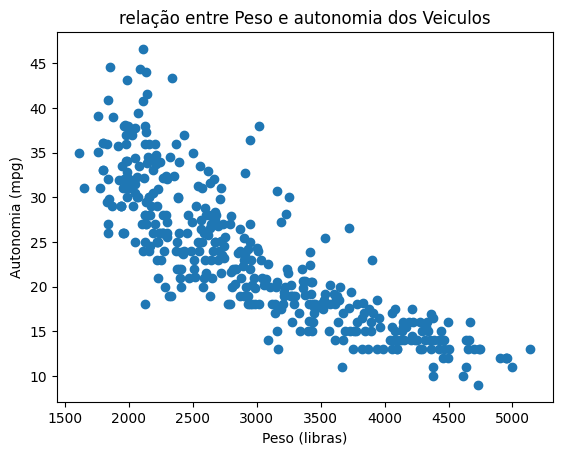

In [115]:
import matplotlib.pyplot as plt
plt.scatter(dataset['weight'], dataset['mpg'])
plt.xlabel("Peso (libras)")
plt.ylabel("Autonomia (mpg)")
plt.title("relação entre Peso e autonomia dos Veiculos")

In [116]:
X = dataset [["weight"]]
Y = dataset [["mpg"]]

In [117]:
x

,weight
0,3504
1,3693
2,3436
3,3433
4,3449
...,...
393,2790
394,2130
395,2295
396,2625


In [118]:
X[["weight"]] = X[["weight"]] * 0.453592
Y[["mpg"]] = Y[["mpg"]] * 0.425144

/tmp/ipython-input-279909834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["weight"]] = X[["weight"]] * 0.453592
/tmp/ipython-input-279909834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[["mpg"]] = Y[["mpg"]] * 0.425144


In [119]:
X

,weight
0,1589.386368
1,1675.115256
2,1558.542112
3,1557.181336
4,1564.438808
...,...
393,1265.521680
394,966.150960
395,1040.993640
396,1190.679000


In [120]:
x.describe()

,weight
count,398.000000
mean,2970.424623
std,846.841774
min,1613.000000
25%,2223.750000
50%,2803.500000
75%,3608.000000
max,5140.000000


In [121]:
escala = StandardScaler()
escala.fit(x)

X_norm = escala.transform(x)

In [122]:
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

In [123]:
rna = MLPRegressor(hidden_layer_sizes=(10, 5),
                  max_iter=2000, tol=0.0001, learning_rate_init=0.1, solver="sgd",
                  activation="logistic", learning_rate="constant", verbose=2)

In [124]:
rna.fit(X_norm_train, y_train)

Iteration 1, loss = 270.26884575
Iteration 2, loss = 41.38129843
Iteration 3, loss = 33.72517717
Iteration 4, loss = 35.86413527
Iteration 5, loss = 31.64385595
Iteration 6, loss = 31.22148685
Iteration 7, loss = 31.59244114
Iteration 8, loss = 31.04708093
Iteration 9, loss = 31.07640794
Iteration 10, loss = 31.09617062
Iteration 11, loss = 31.01233187
Iteration 12, loss = 31.15099866
Iteration 13, loss = 31.23960381
Iteration 14, loss = 31.16443888
Iteration 15, loss = 30.99783222
Iteration 16, loss = 31.07769996
Iteration 17, loss = 30.97462083
Iteration 18, loss = 31.02878467
Iteration 19, loss = 31.02474919
Iteration 20, loss = 31.21106966
Iteration 21, loss = 30.95769445
Iteration 22, loss = 30.50233009
Iteration 23, loss = 29.58667596
Iteration 24, loss = 24.65657823
Iteration 25, loss = 15.80332024
Iteration 26, loss = 12.21634480
Iteration 27, loss = 12.87321009
Iteration 28, loss = 12.56941206
Iteration 29, loss = 12.12973568
Iteration 30, loss = 11.77180638
Iteration 31, loss

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 5),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', verbose=2)

In [125]:
reglinear = SGDRegressor(max_iter=2000,
                         tol=0.00000001,
                         eta0=0.1,
                         learning_rate="constant",
                         verbose=2)

In [126]:
reglinear.fit(X_norm_train, y_train)

-- Epoch 1
Norm: 6.55, NNZs: 1, Bias: 22.630457, T: 278, Avg. loss: 16.299349
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.42, NNZs: 1, Bias: 24.748452, T: 556, Avg. loss: 10.614743
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.59, NNZs: 1, Bias: 22.619300, T: 834, Avg. loss: 10.206781
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.64, NNZs: 1, Bias: 24.972892, T: 1112, Avg. loss: 10.386189
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.29, NNZs: 1, Bias: 23.896381, T: 1390, Avg. loss: 10.559981
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.39, NNZs: 1, Bias: 23.985753, T: 1668, Avg. loss: 10.723437
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 6.71, NNZs: 1, Bias: 22.933801, T: 1946, Avg. loss: 10.158185
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.44, NNZs: 1, Bias: 23.142442, T: 2224, Avg. loss: 10.727028
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.64, NNZs: 1, Bias: 22.891060, T: 2502, Avg. loss: 10.548461
Total traini

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=2000, tol=1e-08,
             verbose=2)

In [127]:
Y_rna_previsao = rna.predict(X_norm_test)
Y_rl_previsao = reglinear.predict(X_norm_test)

In [128]:
r2_rna = r2_score(y_test, Y_rna_previsao)
r2_rl = r2_score(y_test, Y_rl_previsao)

print("R^2 RNA: ", r2_rna)
print("R^2 RL: ", r2_rl)

R^2 RNA:  0.7034391365859378
R^2 RL:  0.5678068634387328
